STEP 1 — LOAD 5 YEARS DATA

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
stocks = [
"RELIANCE.NS","HDFCBANK.NS","BHARTIARTL.NS","TCS.NS","INFY.NS",
"ICICIBANK.NS","SBIN.NS","AXISBANK.NS","KOTAKBANK.NS","HINDUNILVR.NS",
"ITC.NS","MARUTI.NS","BSE.NS","INDUSTOWER.NS","IDEA.NS",
"ASHOKLEY.NS","BATAINDIA.NS","BIRLACORPN.NS","ZENSARTECH.NS","CASTROLIND.NS",
"FEDERALBNK.NS","AKZOINDIA.NS","MCX.NS","HINDCOPPER.NS","VAKRANGEE.NS",
"GFL.NS","COFFEEDAY.NS","SADBHAV.NS","GEPIL.NS","THERMAX.NS"
]

auto_adjust=True → adjusted prices

5 years → long enough regime cycles

In [10]:
data = yf.download(
    stocks,
    period="5y",
    interval="1d",
    auto_adjust=True,
    group_by="ticker"
)

[*********************100%***********************]  30 of 30 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['GEPIL.NS', 'GFL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')


In [35]:
adj_close = pd.DataFrame()

# Extract 'Close' prices for all stocks from the multi-level column DataFrame
# This handles the multi-level column indexing of `data`
close_prices = data.xs('Close', level='Price', axis=1)

# Drop columns (stocks) that are entirely NaN (i.e., no 'Close' data at all)
close_prices_filtered = close_prices.dropna(axis=1, how='all')

# Now, drop rows where any remaining stock has NaN values (e.g., due to holiday, partial data)
adj_close = close_prices_filtered.dropna(axis=0)

# Update the 'stocks' list to reflect the stocks that actually have data
# This is crucial for subsequent operations that iterate over the 'stocks' list
stocks = adj_close.columns.tolist()

In [15]:
adj_close

,RELIANCE.NS,HDFCBANK.NS,BHARTIARTL.NS,TCS.NS,INFY.NS,ICICIBANK.NS,SBIN.NS,AXISBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,...,FEDERALBNK.NS,AKZOINDIA.NS,MCX.NS,HINDCOPPER.NS,VAKRANGEE.NS,GFL.NS,COFFEEDAY.NS,SADBHAV.NS,GEPIL.NS,THERMAX.NS
Date,,,,,,,,,,,,,,,,,,,,,


In [14]:
returns = adj_close.pct_change().dropna()
returns

,RELIANCE.NS,HDFCBANK.NS,BHARTIARTL.NS,TCS.NS,INFY.NS,ICICIBANK.NS,SBIN.NS,AXISBANK.NS,KOTAKBANK.NS,HINDUNILVR.NS,...,FEDERALBNK.NS,AKZOINDIA.NS,MCX.NS,HINDCOPPER.NS,VAKRANGEE.NS,GFL.NS,COFFEEDAY.NS,SADBHAV.NS,GEPIL.NS,THERMAX.NS
Date,,,,,,,,,,,,,,,,,,,,,


In [18]:
## CAGR (5-Year Growth)

def calculate_cagr(price_series):
    n_years = 5
    return (price_series.iloc[-1] / price_series.iloc[0]) ** (1/n_years) - 1

In [17]:
## volatility

def calculate_volatility(return_series):
    return return_series.std() * np.sqrt(252)

Sharpe Ratio (Risk-adjusted return)

Assume risk-free rate = 6%

In [19]:
risk_free_rate = 0.06

def calculate_sharpe(cagr, volatility):
    return (cagr - risk_free_rate) / volatility

In [25]:
import yfinance as yf
import pandas as pd

fundamental_data = []

for stock in stocks:
    try:
        ticker = yf.Ticker(stock)

        # Get balance sheet and income statement
        balance_sheet = ticker.balance_sheet
        income_stmt = ticker.financials

        if balance_sheet.empty or income_stmt.empty:
            continue

        # Get most recent column
        latest_bs = balance_sheet.iloc[:, 0]
        latest_is = income_stmt.iloc[:, 0]

        equity = latest_bs.get("Total Stockholder Equity", None)
        net_income = latest_is.get("Net Income", None)

        if equity and net_income and equity != 0:
            roe = net_income / equity
        else:
            roe = None

        # PE and market cap still from info (optional)
        info = ticker.info
        pe = info.get("trailingPE", None)
        market_cap = info.get("marketCap", None)

        fundamental_data.append({
            "Stock": stock,
            "ROE": roe,
            "PE Ratio": pe,
            "Market Cap": market_cap
        })

    except Exception as e:
        print(f"Error for {stock}: {e}")
        continue

fundamental_df = pd.DataFrame(fundamental_data)
print(fundamental_df)

            Stock   ROE   PE Ratio      Market Cap
0     RELIANCE.NS  None  23.094696  19207991328768
1     HDFCBANK.NS  None  20.367434  14031561687040
2   BHARTIARTL.NS  None  39.063614  12045276676096
3          TCS.NS  None  20.366972   9718905962496
4         INFY.NS  None  19.417420   5474627878912
5    ICICIBANK.NS  None  19.047945   9978680180736
6         SBIN.NS  None  13.244391  11225354207232
7     AXISBANK.NS  None  16.233242   4250460749824
8    KOTAKBANK.NS  None  22.270084   4190533320704
9   HINDUNILVR.NS  None  53.763065   5438918623232
10         ITC.NS  None  20.123077   4097058275328
11      MARUTI.NS  None  31.545801   4708807213056
12         BSE.NS  None  51.815777   1112590647296
13  INDUSTOWER.NS  None  17.510150   1250933735424
14        IDEA.NS  None        NaN   1209108267008
15    ASHOKLEY.NS  None  37.030144   1226754490368
16   BATAINDIA.NS  None  58.494236    104351506432
17  BIRLACORPN.NS  None  14.991851     77961633792
18  ZENSARTECH.NS  None  17.393

In [26]:
print(balance_sheet.index)
print(income_stmt.index)

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Other Equity Interest', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities',
       'Non Current Pension And Other Postretirement Benefit Plans',
       'Tradeand Other Payables Non Current', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Long Term Provisions', 'Curren

In [27]:
ticker = yf.Ticker("RELIANCE.NS")
print(ticker.balance_sheet)
print(ticker.financials)

                                                    2025-03-31    2024-03-31  \
Ordinary Shares Number                            1.353287e+10  1.353222e+10   
Share Issued                                      1.353287e+10  1.353222e+10   
Net Debt                                          2.468850e+12  2.310820e+12   
Total Debt                                        3.695750e+12  3.461420e+12   
Tangible Book Value                               4.342610e+12  4.331070e+12   
...                                                        ...           ...   
Cash Cash Equivalents And Short Term Investments  2.387920e+12  2.113100e+12   
Other Short Term Investments                      1.381470e+12  1.177700e+12   
Cash And Cash Equivalents                         1.006450e+12  9.354000e+11   
Cash Equivalents                                  5.416000e+11  1.952800e+11   
Cash Financial                                    4.648500e+11  7.401200e+11   

                                       

In [23]:
fundamental_data = []

for stock in stocks:
    try:
        ticker = yf.Ticker(stock)
        info = ticker.info

        roe = info.get("returnOnEquity", None)
        pe = info.get("trailingPE", None)
        market_cap = info.get("marketCap", None)

        fundamental_data.append({
            "Stock": stock,
            "ROE": roe,
            "PE Ratio": pe,
            "Market Cap": market_cap
        })

    except:
        continue

fundamental_df = pd.DataFrame(fundamental_data)
print(fundamental_df)

ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: GFL.NS"}}}
ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: GEPIL.NS"}}}


            Stock      ROE   PE Ratio    Market Cap
0     RELIANCE.NS      NaN  23.094696  1.920799e+13
1     HDFCBANK.NS  0.14015  20.367434  1.403156e+13
2   BHARTIARTL.NS  0.23125  39.063614  1.204528e+13
3          TCS.NS  0.42635  20.366972  9.718906e+12
4         INFY.NS  0.32683  19.417420  5.474628e+12
5    ICICIBANK.NS  0.16798  19.047945  9.978680e+12
6         SBIN.NS      NaN  13.244391  1.122535e+13
7     AXISBANK.NS  0.13625  16.233242  4.250461e+12
8    KOTAKBANK.NS      NaN  22.270084  4.190533e+12
9   HINDUNILVR.NS      NaN  53.763065  5.438919e+12
10         ITC.NS      NaN  20.123077  4.097058e+12
11      MARUTI.NS      NaN  31.545801  4.708807e+12
12         BSE.NS      NaN  51.815777  1.112591e+12
13  INDUSTOWER.NS  0.20311  17.510150  1.250934e+12
14        IDEA.NS      NaN        NaN  1.209108e+12
15    ASHOKLEY.NS      NaN  37.030144  1.226754e+12
16   BATAINDIA.NS      NaN  58.494236  1.043515e+11
17  BIRLACORPN.NS      NaN  14.991851  7.796163e+10
18  ZENSARTE

STEP 2 — DEFINE MARKET REGIME (STATE)

Simple regime rule:
• Bull = Price > 200-day MA
• Bear = Price < 200-day MA
• Sideways = otherwise

In [36]:
def calculate_market_regime(price_series):
    ma200 = price_series.rolling(200).mean()

    # Use nested np.where to assign Bull, Bear, or Sideways states
    regime = np.where(
        price_series > ma200 * 1.02, # Condition for Bull market
        2,                           # Value for Bull market
        np.where(                    # Otherwise, check for Bear market
            price_series < ma200 * 0.98, # Condition for Bear market
            0,                           # Value for Bear market
            1                            # Value for Sideways market (if neither Bull nor Bear)
        )
    )

    return pd.Series(regime, index=price_series.index)

STEP 3 — VIRTUAL WALLET

In [29]:
class VirtualWallet:

    def __init__(self, initial_cash=100000, transaction_cost=0.001):
        self.initial_cash = initial_cash
        self.cash = initial_cash
        self.shares = 0
        self.current_stock = None
        self.transaction_cost = transaction_cost
        self.portfolio_value = initial_cash

    def buy(self, price, stock):
        if self.current_stock == stock:
            return 0  # no trade

        trade_cost = self.cash * self.transaction_cost

        self.cash -= trade_cost
        self.shares = self.cash / price
        self.cash = 0

        self.current_stock = stock
        return trade_cost

    def sell(self, price):
        if self.shares == 0:
            return 0

        gross_value = self.shares * price
        trade_cost = gross_value * self.transaction_cost

        self.cash = gross_value - trade_cost
        self.shares = 0
        self.current_stock = None

        return trade_cost

    def update_portfolio_value(self, price):
        if self.shares > 0:
            self.portfolio_value = self.shares * price
        else:
            self.portfolio_value = self.cash

        return self.portfolio_value

STEP 4 — RL AGENT (TABULAR Q-LEARNING STYLE)

In [43]:
class MarketEnvironment:

    def __init__(self, price_data, stocks):
        self.price_data = price_data
        self.stocks = stocks
        self.n_steps = len(price_data)
        self.current_step = 200  # start after MA period

        # Ensure 'RELIANCE.NS' is in adj_close.columns before accessing
        if "RELIANCE.NS" in price_data.columns:
            self.regime = calculate_market_regime(price_data["RELIANCE.NS"])
        else:
            # Fallback if RELIANCE.NS is not available
            # This scenario indicates an issue in data filtering or initial stock list.
            # For now, let's pick the first available stock, but a more robust solution
            # might involve re-evaluating the 'stocks' list earlier.
            if not price_data.empty and not price_data.columns.empty:
                first_stock = price_data.columns[0]
                print(f"Warning: 'RELIANCE.NS' not found. Using {first_stock} for regime calculation.")
                self.regime = calculate_market_regime(price_data[first_stock])
            else:
                raise ValueError("Price data is empty, cannot calculate market regime.")

        self.wallet = VirtualWallet()

    def reset(self):
        self.current_step = 200
        self.wallet = VirtualWallet()
        state = self.get_state()
        return state

    def encode_state(self):
        regime_state = self.regime.iloc[self.current_step]

        if self.wallet.current_stock is None:
            holding_index = len(self.stocks)  # special index for no holding, one past max stock index
        else:
            # Ensure the current stock is in the updated stocks list
            if self.wallet.current_stock in self.stocks:
                holding_index = self.stocks.index(self.wallet.current_stock)
            else:
                # This case should ideally not happen if stocks list is correctly updated
                # but as a fallback, treat it as no holding or an invalid state.
                # For now, let's treat it as no holding.
                holding_index = len(self.stocks)

        # Max regime value is 2, and max holding index is len(self.stocks) (if no holding)
        # So n_states = 3 * (len(self.stocks) + 1)
        state_id = int(regime_state * (len(self.stocks) + 1) + holding_index)
        return state_id

    def get_state(self):
        return self.encode_state()

    def calculate_daily_volatility(self, stock):
        window = 20  # 1 month
        if self.current_step < window:
            return 0
        returns = self.price_data[stock].pct_change().iloc[
            self.current_step-window:self.current_step
        ]
        return returns.std()

    def step(self, action):
        stock = self.stocks[action]

        today_prices = self.price_data.iloc[self.current_step]
        next_prices = self.price_data.iloc[self.current_step + 1]

        reward = 0
        transaction_cost = 0

        # If switching stocks
        if self.wallet.current_stock:
            sell_price = today_prices[self.wallet.current_stock]
            transaction_cost += self.wallet.sell(sell_price)

        buy_price = today_prices[stock]
        transaction_cost += self.wallet.buy(buy_price, stock)

        # Update next day portfolio value
        old_value = self.wallet.portfolio_value
        new_value = self.wallet.update_portfolio_value(next_price)

        daily_return = (new_value - old_value) / old_value

        volatility_penalty = 0.5 * self.calculate_daily_volatility(stock)

        reward = daily_return - volatility_penalty - (transaction_cost / old_value)

        self.current_step += 1

        done = self.current_step >= self.n_steps - 1

        next_state = self.get_state()

        return next_state, reward, done

In [8]:
env = MarketEnvironment(adj_close, stocks)

state = env.reset()

done = False
total_reward = 0

while not done:
    action = np.random.randint(0, len(stocks))
    next_state, reward, done = env.step(action)
    total_reward += reward

print("Final Portfolio Value:", env.wallet.portfolio_value)
print("Total Reward:", total_reward)


Error: The 'data' DataFrame is empty or 'RELIANCE.NS' is not available. Please check the data loading step in cell `gVU2KpzPgMim`.


In [31]:
def encode_state(self):
    regime_state = self.regime.iloc[self.current_step]

    if self.wallet.current_stock is None:
        holding_index = 30  # special index for no holding
    else:
        holding_index = self.stocks.index(self.wallet.current_stock)

    state_id = regime_state * 31 + holding_index
    return state_id

In [32]:
def get_state(self):
    return self.encode_state()

In [33]:
class QLearningAgent:

    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.95, epsilon=0.1):
        self.q_table = np.zeros((n_states, n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_actions = n_actions

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state):
        best_next_action = np.max(self.q_table[next_state])

        self.q_table[state, action] += self.alpha * (
            reward + self.gamma * best_next_action - self.q_table[state, action]
        )

In [39]:
env = MarketEnvironment(adj_close, stocks)

n_states = 3 * 31
n_actions = len(stocks)

agent = QLearningAgent(n_states, n_actions)

episodes = 10  # Increase later

for episode in range(episodes):

    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.choose_action(state)

        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, next_state)

        state = next_state
        total_reward += reward

    print(f"Episode {episode+1}, Total Reward: {total_reward}")

Episode 1, Total Reward: -179992.76980510706
Episode 2, Total Reward: -178173.19614989706
Episode 3, Total Reward: -210292.87054123986
Episode 4, Total Reward: -170216.8574695573
Episode 5, Total Reward: -192558.11245713566
Episode 6, Total Reward: -236944.35900013524
Episode 7, Total Reward: -178900.503076975
Episode 8, Total Reward: -182655.5204803287
Episode 9, Total Reward: -191008.28192561635
Episode 10, Total Reward: -155754.58061458872


In [40]:
agent.epsilon = 0  # pure exploitation

state = env.reset()
done = False

while not done:
    action = agent.choose_action(state)
    next_state, reward, done = env.step(action)
    state = next_state

print("Final Portfolio Value:", env.wallet.portfolio_value)

Final Portfolio Value: 26416.84739774997


In [46]:
class QLearningAgent:

    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.95,
                 epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):

        self.q_table = np.zeros((n_states, n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.n_actions = n_actions

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state):
        best_next = np.max(self.q_table[next_state])

        self.q_table[state, action] += self.alpha * (
            reward + self.gamma * best_next - self.q_table[state, action]
        )

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [48]:
# Re-instantiate QLearningAgent to pick up the updated class definition.
# This is necessary because the QLearningAgent class was redefined in a previous cell (M9f0yPkXloWm)
# but the 'agent' object was not re-initialized to use this new definition.
# Note: This will reset the agent's Q-table and epsilon, restarting the training from scratch for this agent.
n_states = 3 * 31
n_actions = len(stocks)
agent = QLearningAgent(n_states, n_actions, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995)

for episode in range(episodes):

    state = env.reset()
    done = False

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)
        state = next_state

    agent.decay_epsilon()

In [49]:
equity_curve = []

state = env.reset()
done = False

while not done:
    action = agent.choose_action(state)
    next_state, reward, done = env.step(action)
    equity_curve.append(env.wallet.portfolio_value)
    state = next_state

In [50]:
import numpy as np

def calculate_performance(equity_curve):
    equity = np.array(equity_curve)

    returns = equity[1:] / equity[:-1] - 1

    cagr = (equity[-1] / equity[0]) ** (252/len(equity)) - 1
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252)

    running_max = np.maximum.accumulate(equity)
    drawdown = (equity - running_max) / running_max
    max_drawdown = drawdown.min()

    return cagr, sharpe, max_drawdown

In [51]:
cagr, sharpe, mdd = calculate_performance(equity_curve)

print("Final Value:", equity_curve[-1])
print("CAGR:", cagr)
print("Sharpe Ratio:", sharpe)
print("Max Drawdown:", mdd)

Final Value: 16056.29904567967
CAGR: -0.35924693567290666
Sharpe Ratio: -1.1681503528052428
Max Drawdown: -0.8635168548982686


In [52]:
benchmark = yf.download("^NSEI", period="5y", auto_adjust=True)["Close"]
benchmark = benchmark.loc[adj_close.index]

benchmark_returns = benchmark.pct_change().dropna()
benchmark_equity = 100000 * (1 + benchmark_returns).cumprod()

[*********************100%***********************]  1 of 1 completed


In [53]:
rl_equity = pd.Series(equity_curve,
                      index=adj_close.index[200:200+len(equity_curve)])

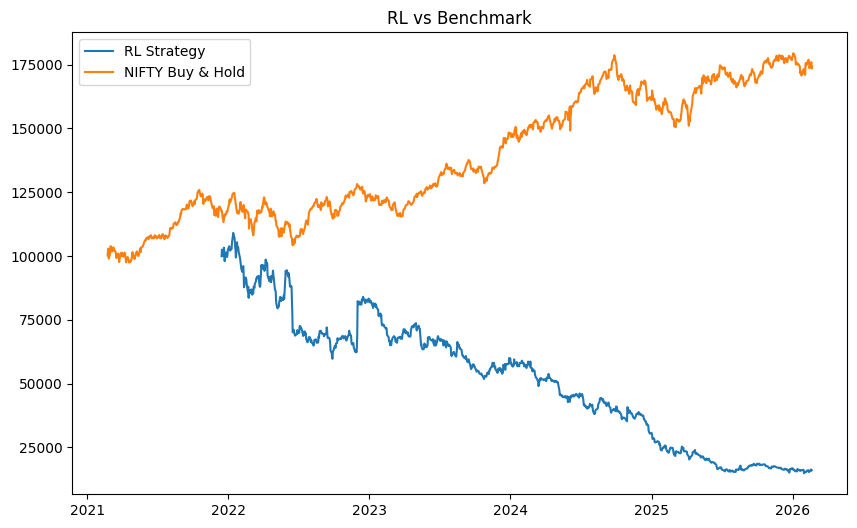

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(rl_equity, label="RL Strategy")
plt.plot(benchmark_equity, label="NIFTY Buy & Hold")
plt.legend()
plt.title("RL vs Benchmark")
plt.show()

In [55]:
policy = np.argmax(agent.q_table, axis=1)
policy_matrix = policy.reshape(3, 31)[:, :-1]  # remove 'no holding'

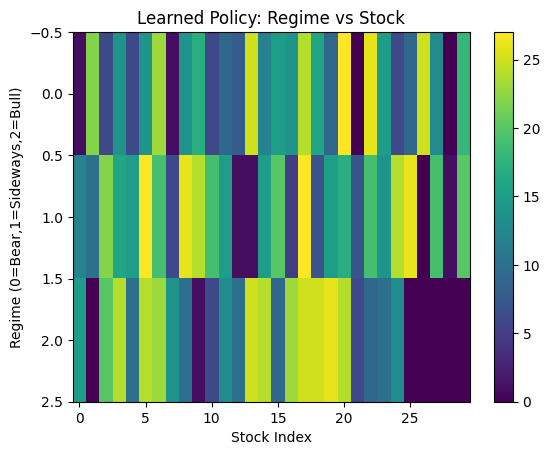

In [56]:
plt.imshow(policy_matrix, aspect="auto")
plt.colorbar()
plt.title("Learned Policy: Regime vs Stock")
plt.ylabel("Regime (0=Bear,1=Sideways,2=Bull)")
plt.xlabel("Stock Index")
plt.show()